# Analysis of World Energy Consumption data
This dataset contains information on energy consumption and production by all the countries in the world. It is collection of key metrics maintained by Our World in Data.
* [Our World in Data](https://ourworldindata.org/)

and the csv dataset is available from this kaggle site:
* [kaggle](https://www.kaggle.com/pralabhpoudel/world-energy-consumption)

We've downloaded the data and stored it in ./data/World Energy Consumption.csv

The main question we want to answer is:
* What are the top 10 countries with highest oil consumption?  (How does it compare to one another?)
* What is the most common energy type consumed in United States?
* How does energy sources generated by the US compare to one another?
* What are the top 5 countries that consumes renewable energy?


In [99]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read the data into a data frame

This notebook use pandas to quickly get information from a large dataset. I used pd.read_csv function to read in the data. 


In [2]:
df = pd.read_csv('data/World Energy Consumption.csv')
df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


# Understanding the dataset  

### Number of rows

In [3]:
index_values = df.index
len(index_values)

17432

### Look at all of the columns

In [4]:
df.columns

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=122)

### Rough overview

df.describe provide description of data. It conducts basic statistics on each column of data

In [5]:
df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17432.000000,7445.000000,10394.000000,4.862000e+03,7893.000000,6521.000000,8565.000000,9842.00000,9892.000000,4206.000000,...,5499.000000,4290.000000,1.045600e+04,6076.000000,1543.000000,4284.000000,4207.000000,4290.000000,5499.000000,4290.000000
mean,1973.094367,20.830774,8.798102,1.921623e+14,14.369018,18.242190,18.033792,inf,36.853247,1.549155,...,14.776571,29.375128,5.417833e+11,1.006011,313.478014,0.345406,2.163830,15.080935,53.625783,134.003056
std,34.333995,697.178744,135.503698,1.339910e+16,85.415649,335.492675,169.610587,NaN,267.425811,3.544546,...,58.750432,127.852638,4.083842e+12,3.680550,6836.857935,1.337962,17.013149,126.674141,209.543489,513.368047
min,1900.000000,-100.000000,-2326.870000,-1.000000e+02,-1054.320000,-100.000000,-2239.737000,-92.63200,-6083.407000,0.000000,...,0.000000,0.000000,1.963080e+08,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-1.532000,0.000000,0.000000e+00,0.000000,-1.429000,0.000000,-0.43075,-0.044000,0.000000,...,0.000000,0.000000,1.253804e+10,0.000000,2.159500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,0.000000,0.000000,2.583500e+00,0.000000,0.278000,0.000000,2.56700,0.735500,0.021500,...,0.000000,0.000000,4.281649e+10,0.000000,19.749000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,7.690000,0.334000,9.703500e+00,2.559000,9.091000,3.222000,6.87650,10.328250,1.362750,...,0.794000,0.295500,1.750000e+11,0.108250,50.000000,0.020000,0.010000,0.141000,3.046500,4.744750
max,2020.000000,44965.754000,3060.593000,9.342930e+17,2112.975000,25500.000000,2790.614000,inf,6446.809000,33.912000,...,825.094000,1763.675000,1.070000e+14,56.338000,242384.843000,20.660000,428.736000,3540.051000,2825.425000,6928.363000


## Unique Countries

In [6]:
countries = df['country'].unique()
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia'

In [7]:
len(countries)

242

### Unique Years

In [8]:
years = df['year'].unique()
years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Summary
This dataset consists of 17432 rows and 122 columns of energy consumption and production of 242 countries from the year 1900 to 2020.

# Create a pivot table 
  Objective - To look at one energy type consumed by every country in the world.
* Index is the year, 
* Columns are the values in the 'iso_code' column, and
* Value is the 'oil_consumption' (measured in terawatt-hours)

In [14]:
oil_consumption_by_isocode = pd.pivot_table(df, values="oil_consumption", index=["year"], columns=["iso_code"])
oil_consumption_by_isocode


iso_code,ARE,ARG,AUS,AUT,AZE,BEL,BGD,BGR,BLR,BRA,...,TKM,TTO,TUR,TWN,UKR,USA,UZB,VEN,VNM,ZAF
year,,,,,,,,,,,,,,,,,,,,,
1965,0.855,260.140,181.118,65.298,NaN,188.465,NaN,43.716,NaN,177.731,...,NaN,22.198,41.989,25.688,NaN,6581.066,NaN,112.024,18.012,67.358
1966,0.912,268.565,214.048,71.789,NaN,192.260,NaN,49.874,NaN,193.798,...,NaN,22.354,50.116,30.389,NaN,6909.999,NaN,110.105,39.364,73.190
1967,0.980,275.187,234.388,76.548,NaN,212.032,NaN,62.723,NaN,199.992,...,NaN,23.322,58.848,36.093,NaN,7177.113,NaN,112.342,57.652,79.770
1968,1.095,281.008,255.285,88.466,NaN,246.159,NaN,74.338,NaN,240.196,...,NaN,23.769,70.703,43.047,NaN,7675.173,NaN,122.373,58.814,86.710
1969,1.216,291.982,262.448,97.226,NaN,284.007,NaN,91.279,NaN,263.568,...,NaN,24.918,78.659,51.549,NaN,8093.231,NaN,120.898,71.084,95.325
1970,1.416,262.160,290.196,107.044,NaN,309.816,NaN,106.039,NaN,298.218,...,NaN,25.561,83.338,61.906,NaN,8416.885,NaN,126.480,73.695,103.300
1971,1.671,279.975,305.545,119.607,NaN,317.507,8.135,116.629,NaN,328.595,...,NaN,26.413,98.789,86.651,NaN,8706.074,NaN,127.675,62.343,112.905
1972,2.195,280.357,311.034,129.123,NaN,343.473,9.919,121.285,NaN,377.978,...,NaN,42.872,111.987,93.771,NaN,9406.468,NaN,139.253,64.550,123.062
1973,3.426,281.318,331.893,139.928,NaN,360.635,11.208,127.888,NaN,465.332,...,NaN,43.146,136.556,119.625,NaN,9929.481,NaN,152.888,63.385,135.769


## Questions
### 1) What are the top 10 countries with highest oil consumption?  (How does it compare to one another?)

This question can be answered by the use of groupby method to determine the aggregate sum of oil consumption in all countries using their 'iso_code' over the years. Then, sort it to get the top ten countries.
We check how the values compares to one another using a bar diagram.

In [16]:
top_countries_oil_consumption = df.groupby("iso_code")["oil_consumption"].agg(sum)
sorted_country = top_countries_oil_consumption.sort_values(ascending=False)[1:11]
sorted_country

iso_code
USA    525840.858
JPN    145324.879
CHN    139521.183
DEU     83840.342
RUS     68465.379
FRA     59487.587
CAN     56692.681
IND     55922.581
ITA     54864.237
GBR     54736.395
Name: oil_consumption, dtype: float64

Text(0.5, 1.0, 'Top 10 largest consumer of oil energy')

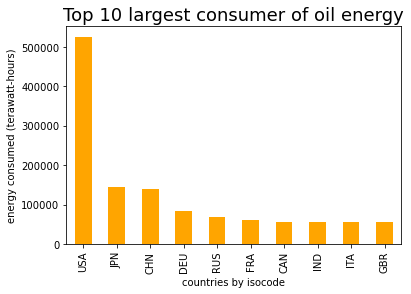

In [32]:
visual_rep = sorted_country.plot.bar(x='iso_code',y='oil_cosumption',color='orange')
visual_rep
plt.ylabel("energy consumed (terawatt-hours)")
plt.xlabel("countries by isocode")
plt.title("Top 10 largest consumer of oil energy",fontsize = 18)

### Analysis
We see that the top 10 countries that consumes energy produced by oil are United States, Japan, China, Germany, Russia, France, Canada, India, Italy, and Great Britian. From the bar diagram, we see that USA consumes oil energy by significantly large amount as compared to other countries in the list (~3.5 times larger than Japan).

## Case Study for United States

### 2) What is the most common energy type consumed in United States?

Text(0, 0.5, 'Energy Consumption (terawatt-hours)')

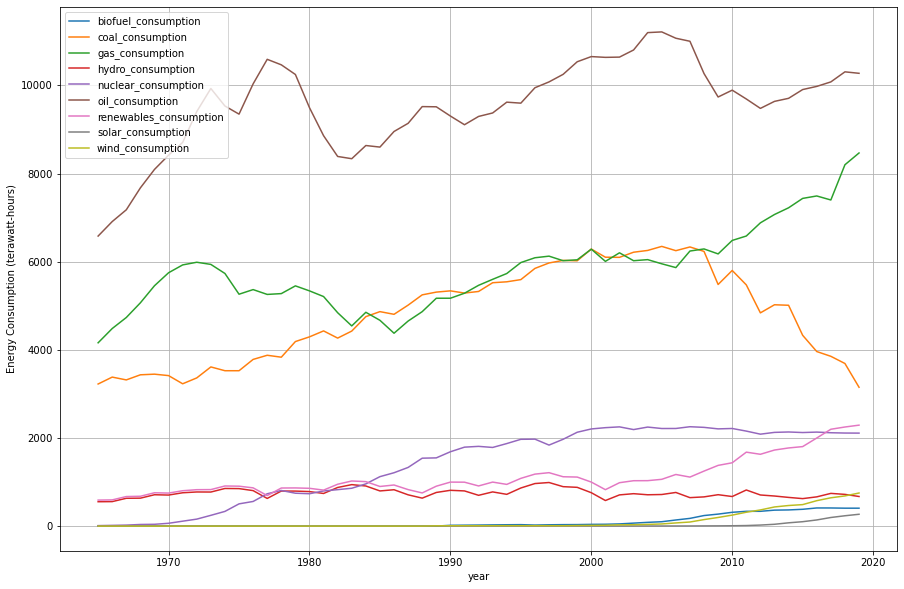

In [62]:
plt.figure(figsize=(15,10))
different_sources = ['biofuel_consumption','coal_consumption','gas_consumption',
                     'hydro_consumption','nuclear_consumption','oil_consumption',
                     'renewables_consumption','solar_consumption','wind_consumption']
d1 = df[df['country'] == 'United States']                    
for sources in different_sources:
    plt.plot(d1['year'],d1[sources],label=sources)
plt.legend()
plt.grid()
plt.xlabel('year')
plt.ylabel('Energy Consumption (terawatt-hours)')

### Analysis
As we see through the plot, US consumes more oil energy as compared to other sources of energy. The other top two energy consumption is from coal and gas. We see a sharp decline in coal energy consumption starting 2010 because of decline in coal industry and increased regulation to reduce greenhouse gases. This has caused increase in  the consumption of renewable sources of energy in the recent years. This analysis raise another interesting question - how much energy does US generate?

### 3) How does energy sources generated by the US compare to one another?

Text(0, 0.5, 'Electricity Generated (terawatt-hours)')

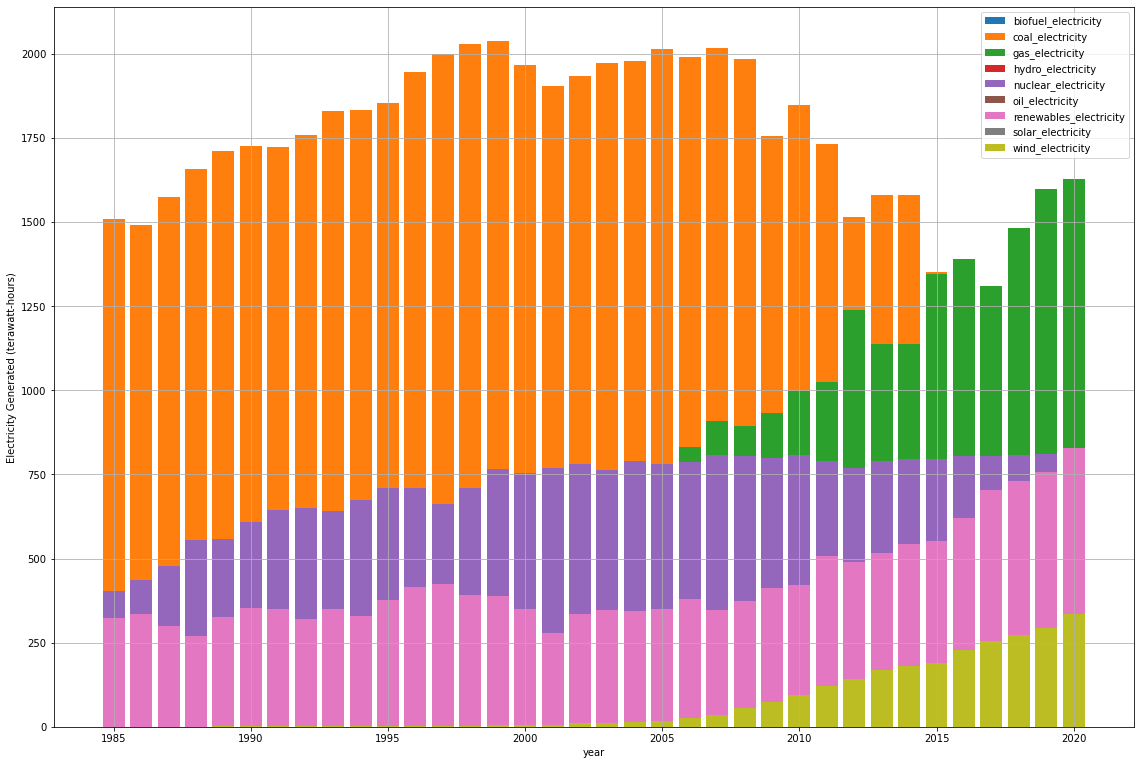

In [63]:
fig = plt.figure(figsize=(15,10))
different_sources = ['biofuel_electricity','coal_electricity','gas_electricity',
                     'hydro_electricity','nuclear_electricity','oil_electricity',
                     'renewables_electricity','solar_electricity','wind_electricity']
d1 = df[df['country'] == 'United States']    
ax = fig.add_axes([0,0,1,1])
for sources in different_sources:
    ax.bar(d1['year'],d1[sources],label=sources)
plt.legend()
plt.grid()
plt.xlabel('year')
plt.ylabel('Electricity Generated (terawatt-hours)')

### Analysis
We can make some interesting observation from the stacked bar diagram seen above. While the largest energy source that US consumes is oil, the country doesn't generate the energy itself. US imports oil from other countries. In US, the most energy generated is from coal. However, in recent year we see a decline in coal energy being generated in US due to decline in coal industry and more shift in producing renewable energy and wind energy. 

### 4) What are the top 5 countries that consumes renewable energy?

In [100]:
top_countries_renewables_consumption = df.groupby("iso_code")["renewables_consumption"].agg(sum)
sorted_country = top_countries_renewables_consumption.sort_values(ascending=False)[1:6]
sorted_country

iso_code
USA    60751.537
CHN    53736.392
CAN    45384.005
BRA    38914.271
RUS    15961.431
Name: renewables_consumption, dtype: float64

## Pivot Table for top 5 countries
* Index is the year, 
* Columns are the values in the 'country' column, and
* Value is the 'renewable_consumption' (measured in terawatt-hours)

In [101]:
renewable_energy = pd.pivot_table(df, values="renewables_consumption", index=["year"], columns=["country"])
renewable_energy_big_five = renewable_energy[['United States','China','Canada', 'Brazil', 'Russia']]
renewable_energy_big_five

country,United States,China,Canada,Brazil,Russia
year,,,,,
1965,589.740,61.381,328.022,70.875,NaN
1966,594.442,62.461,363.889,77.517,NaN
1967,670.263,53.843,372.011,81.081,NaN
1968,676.947,63.529,378.334,84.861,NaN
1969,756.266,64.609,418.439,90.811,NaN
1970,749.246,66.770,439.270,111.988,NaN
1971,802.330,80.765,451.281,121.757,NaN
1972,826.081,91.531,504.553,142.771,NaN
1973,828.341,102.297,540.706,162.891,NaN


Text(0, 0.5, 'Energy Consumption(terawatt-hours)')

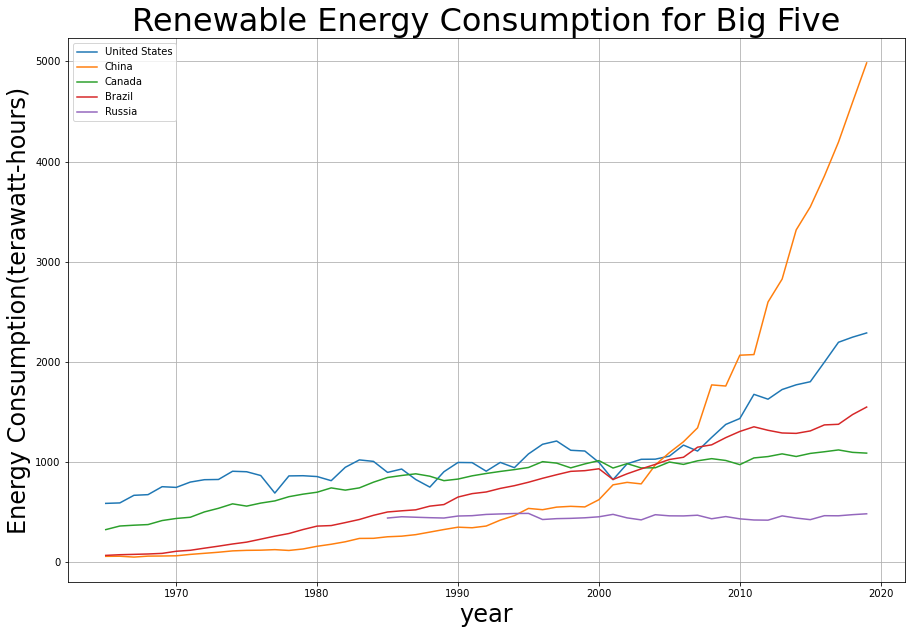

In [102]:
renewable_energy_big_five.plot(figsize=(15,10))
plt.grid()
plt.legend()
plt.title('Renewable Energy Consumption for Big Five',fontsize=32)
plt.xlabel('year',fontsize = 24)
plt.ylabel('Energy Consumption(terawatt-hours)', fontsize = 24)

In [103]:
#pandas.read_csv
# pandas.pivot_table
#pandas,plot 
#pandas.groupby
#pandas.analysis
#print the array of columns and the index array


'done'

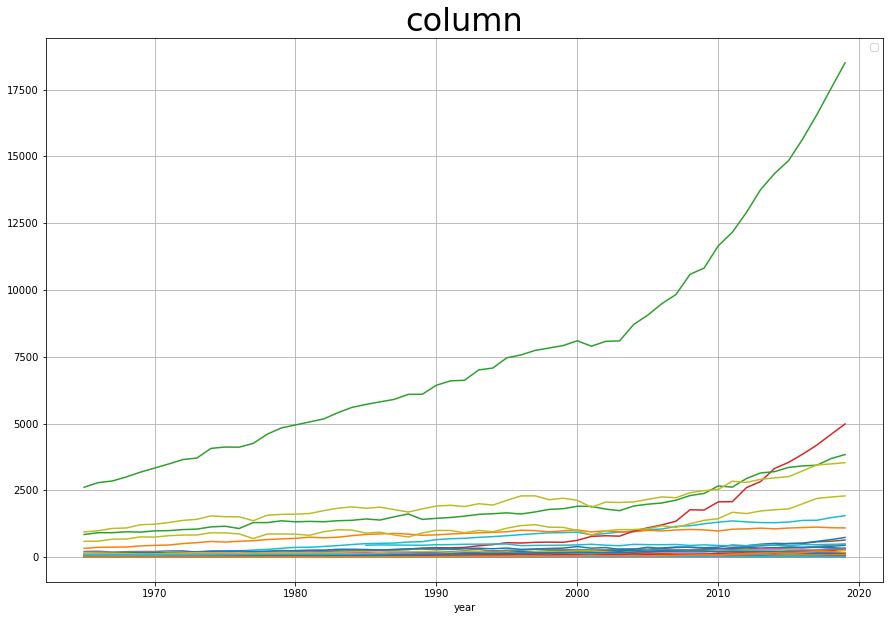

In [104]:
df2.plot(figsize=(15,10))
plt.grid()
plt.title('column',fontsize=32)
plt.legend([])
'done'

In [45]:
column = 'new_deaths_smoothed'
plt.figure(figsize=(20,20))
df3 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df3.plot(figsize=(20,20))
plt.legend([])


KeyError: 'new_deaths_smoothed'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
df

In [ ]:
df4 = df.groupby(['date']).new_deaths_smoothed.agg(sum)
df4

In [ ]:
df4.plot(figsize=(15,10))
plt.grid()
plt.title('Covid deaths worldwide from Jan 2020 to Feb 2022',fontsize=16)

### Analysis
From the plot we can see that since 2005 China has become the biggest consumer of renewable energy in the world. It outranks United States to become the largest consumer of renewable energy. In 2005, China took incentive and invested in renewable energy to reduce greenhouse gases and air pollution leading in the sudden spike renewable energy usage.